# SPaRTA

In [ ]:
import sparta
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({"text.usetex": True,
                     "font.family": "Times new roman"})
colors =  ['#377eb8', '#ff7f00', '#4daf4a',
           '#f781bf', '#a65628', '#984ea3',
           '#999999', '#e41a1c', '#dede00']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

# Check correlation function

This is an attempt to replicate Fig. 6 in https://arxiv.org/pdf/2302.08506.

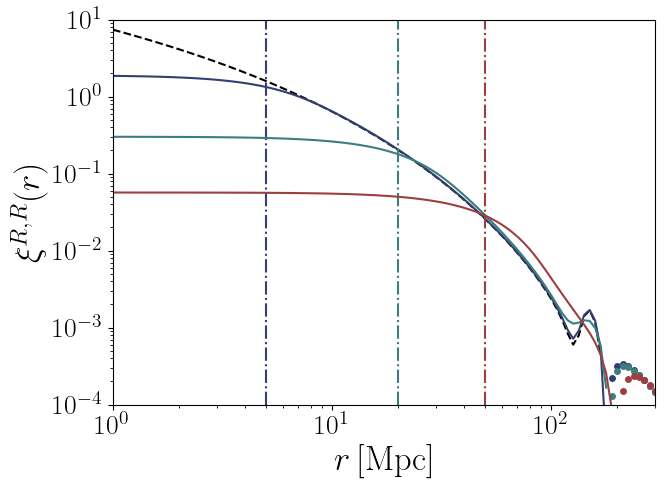

In [14]:
CLASS_OUTPUT = sparta.COSMO_PARAMS().run_CLASS()
r_array = np.logspace(0,np.log10(300),100)
fix, ax = plt.subplots(1,1,figsize=(7,5))
r_smooth_list = [0,5,20,50]
colors_for_this_fig = ['k','#333F70','#3C7D7E','#9C403F']
for ind, r_smooth in enumerate(r_smooth_list):
    xi_arr = np.array(
        [
            sparta.compute_correlation_function(
                CLASS_OUTPUT = CLASS_OUTPUT,
                r = r,
                r_smooth = r_smooth,
            ) 
        for r in r_array]
    )
    p_inds = xi_arr > 0
    n_inds = xi_arr < 0
    if r_smooth == 0:
        ls = '--'
    else:
        ls = '-'
    color = colors_for_this_fig[ind]
    ax.loglog(r_array[p_inds],xi_arr[p_inds],color=color,ls=ls)
    if r_smooth > 0:
        ax.loglog(r_array[n_inds],abs(xi_arr[n_inds]),ls='',marker='o',markerfacecolor=color,markeredgecolor='none',markersize=5)
    ax.axvline(r_smooth,ls='-.',color=color)
ax.set_xlim([1,300])
ax.set_ylim([1e-4,10])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('$r\\,[\\mathrm{Mpc}]$',fontsize=25)
ax.set_ylabel('$\\xi^{R,R}(r)$',fontsize=25);

In [15]:
CLASS_OUTPUT = sparta.COSMO_PARAMS().run_CLASS()
sigma8 = sparta.compute_RMS(
    CLASS_OUTPUT = CLASS_OUTPUT,
    r_smooth = 8/CLASS_OUTPUT.h(),
    z=0
)
print(f"sigma8 = {sigma8}")

sigma8 = 0.8103860080650431


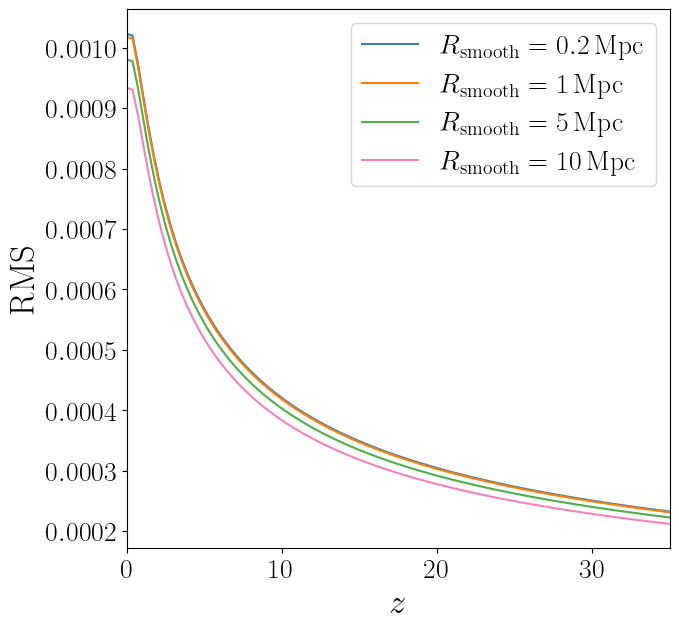

In [16]:
CLASS_OUTPUT = sparta.COSMO_PARAMS().run_CLASS()
r_smooth_list = [0.2,1,5,10]
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
for r_smooth in r_smooth_list:
    fig, ax = sparta.plot_RMS(
        CLASS_OUTPUT = CLASS_OUTPUT,
        r_smooth = r_smooth,
        ax = ax,
        kind = "velocity",
        label = "$R_\\mathrm{smooth}=" + f"{r_smooth}" + "\\,\\mathrm{Mpc}$"
    )

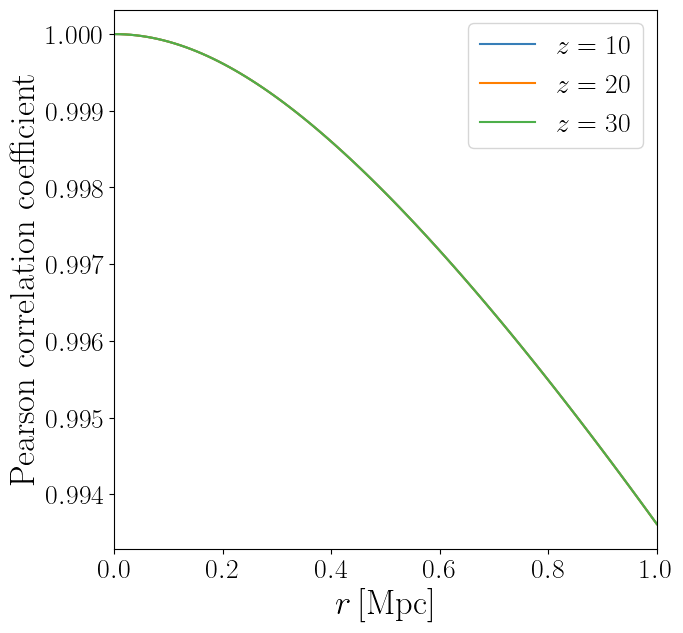

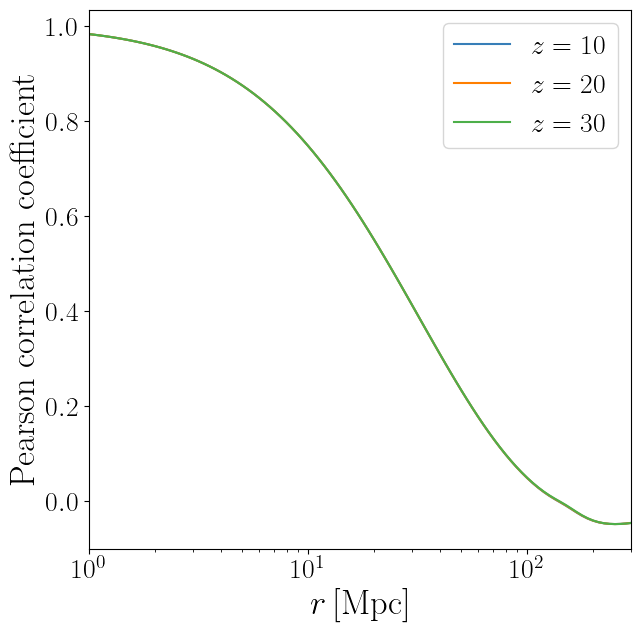

In [17]:
CLASS_OUTPUT = sparta.COSMO_PARAMS().run_CLASS()
z_list = [10,20,30]
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
for z in z_list:
    fig, ax = sparta.plot_Pearson_coefficient(
        CLASS_OUTPUT = CLASS_OUTPUT,
        z = z,
        r_smooth = 0.2,
        r_min = 0.,
        r_max = 1.,
        evolve_z2 = True,
        ax = ax,
        kinds = ("v_perp","v_perp"),
        label = "$z=" + f"{z}" + "$"
    )

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
for z in z_list:
    fig, ax = sparta.plot_Pearson_coefficient(
        CLASS_OUTPUT = CLASS_OUTPUT,
        z = z,
        r_smooth = 0.2,
        r_min = 1.,
        r_max = 300.,
        evolve_z2 = True,
        log_x = True,
        ax = ax,
        kinds = ("v_parallel","v_parallel"),
        label = "$z=" + f"{z}" + "$"
    )

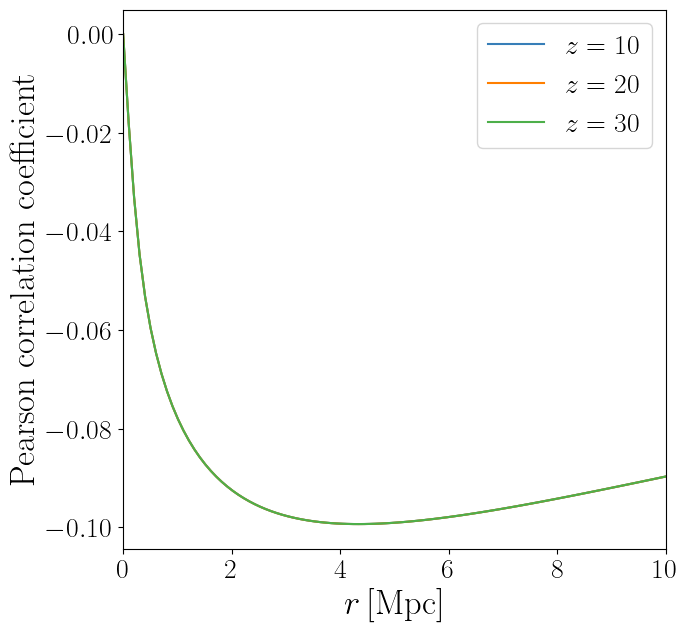

In [18]:
CLASS_OUTPUT = sparta.COSMO_PARAMS().run_CLASS()
z_list = [10,20,30]
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
for z in z_list:
    fig, ax = sparta.plot_Pearson_coefficient(
        CLASS_OUTPUT = CLASS_OUTPUT,
        z = z,
        r_smooth = 0.2,#sim_params["Delta_L"],
        r_min = 0.,
        r_max = 10.,
        ax = ax,
        kinds = ("density_b","v_parallel"),
        label = "$z=" + f"{z}" + "$"
    )

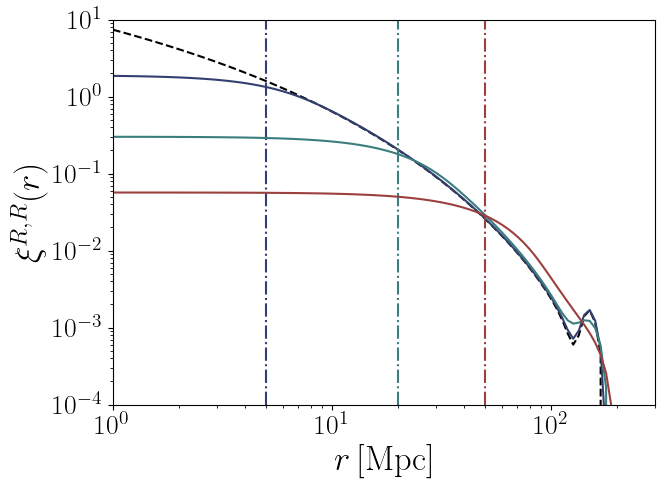

In [19]:
CLASS_OUTPUT = sparta.COSMO_PARAMS().run_CLASS()
r_smooth_list = [0,5,20,50]
colors_for_this_fig = ['k','#333F70','#3C7D7E','#9C403F']
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for ind, r_smooth in enumerate(r_smooth_list):
    if r_smooth == 0:
        ls = '--'
    else:
        ls = '-'
    fig, ax = sparta.plot_correlation_function(
        CLASS_OUTPUT = CLASS_OUTPUT,
        z = 0.,
        r_smooth = r_smooth,
        r_min = 1.,
        r_max = 300.,
        log_x = True,
        ax = ax,
        color=colors_for_this_fig[ind],
        ls = ls
    )
    ax.axvline(r_smooth,ls='-.',color=colors_for_this_fig[ind])
ax.set_xlim([1,300])
ax.set_ylim([1e-4,10])
ax.set_ylabel('$\\xi^{R,R}(r)$',fontsize=25)
ax.set_xscale('log')
ax.set_yscale('log');

(0.9996, 0.9995)

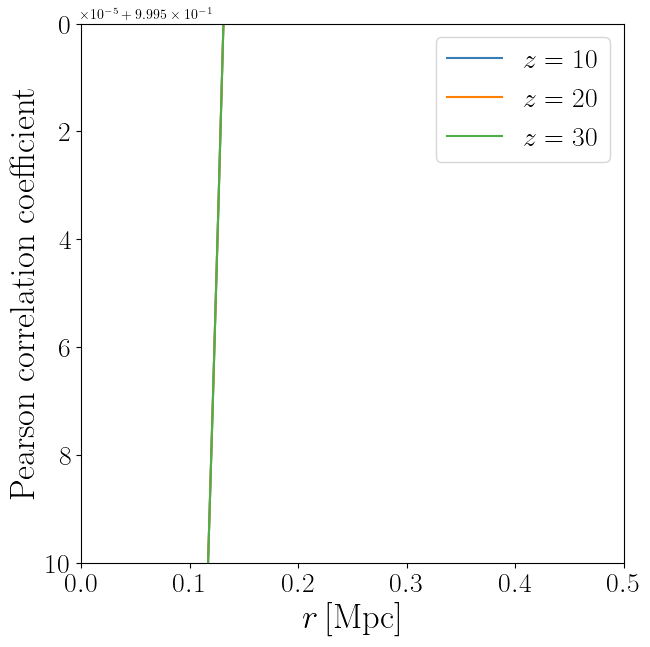

In [20]:
CLASS_OUTPUT = sparta.COSMO_PARAMS().run_CLASS()
z_list = [10,20,30]
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
for z in z_list:
    fig, ax = sparta.plot_Pearson_coefficient(
        CLASS_OUTPUT = CLASS_OUTPUT,
        z = z,
        r_smooth = 0.2,
        r_min = 0.,
        r_max = 0.5,
        evolve_z2 = True,
        ax = ax,
        kinds = ("v_parallel","v_parallel"),
        label = "$z=" + f"{z}" + "$"
    )
ax.set_ylim([1-4e-4,1-5e-4])

In [23]:
print(sparta.SIM_PARAMS.__doc__)


    Class for setting simulation parameters.
    
    Parameters
    ----------
    This class contains the following simulation parameters:
        - z_abs: float
            The redshift where the photon is absorbed.
        - N_photons: int
            Number of photons to simulate.
        - Delta_L: float
            "Grid" resolution in Mpc.
        Delta_z_initial, float
            The initial redshift difference with respect to the absorption point, normalized by 1+z_abs.
            It is (Delta z)/(1+z_abs), which equals to (Delta nu)/nu_alpha if there are no peculiar or thermal velocities.
        - x_stop: float
            Distance from absorption point to stop the simulation in units of the diffusion scale.
        - INCLUDE_VELOCITIES: bool
            If True, bulk peculiar velocities will be included in the simulation.
            Otherwise, assumes zero velocity throughout the simulation.
        - NO_CORRELATIONS: bool
            If True, the correlations in the v